!pip install git+https://github.com/ssut/py-hanspell.git

!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

!pip install konlpy

!pip install wordcloud

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import sys
import datetime
from datetime import timedelta
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

from pykospacing import Spacing


In [2]:
df = pd.read_csv('여기어때_크롤링.csv')

In [3]:
df

,hotel,star,review,date
0,신라스테이 역삼,8.0,출장으로 역삼 근처 호텔 찾아보다가 신라스테이 근처에 센터필드도 있고 밥집 카페도 ...,20시간 전
1,신라스테이 역삼,10.0,잘쉬디ㅡ으ㅡㅁ잘쉬디ㅡ으ㅡㅁ잘쉬디ㅡ으ㅡㅁ잘쉬디ㅡ으ㅡㅁ잘쉬디ㅡ으ㅡㅁ잘쉬디ㅡ으ㅡㅁ잘쉬디ㅡ...,10일 전
2,신라스테이 역삼,10.0,깔끔하고 고급스러웠습니다 가격대비 만족했던곳이라 넘넘 만족스러웠어요 로비도 깔끔하고...,12일 전
3,신라스테이 역삼,10.0,직원분들 너무 친절하십니다 안내데스크가 넓어서 잠시 쉬기에도 편합니다 편의점이 바로...,24일 전
4,신라스테이 역삼,10.0,깔끔하고 서울에서 갑자기 일이 있거나 놀게 되었을 때 가장 합리적인 선택이라고 생각...,24일 전
...,...,...,...,...
143896,뜨랑블루 호텔,4.3,시설 깨끗하고 다 좋은데퇴실도 안햇는데 청소하시는분인지 입구문을 맘대로 여시더라구요...,5년 전
143897,뜨랑블루 호텔,10.0,깔끔하고 친철하고 모두 만족해요꼭 한번더 오고 싶은 숙박업소입니다.,5년 전
143898,뜨랑블루 호텔,10.0,괜찮았어요 좋더라구요 마음에 들었어요냄새도 안나드러구요,5년 전
143899,뜨랑블루 호텔,10.0,시설 신림권에서 최고청결하고 수건에서 냄새도 안나고흠이라면 1000원받는 일회용품이...,5년 전


분석을 마친 다음날 데이터 전처리를 했다.
#날짜 형식 바꾸기

In [38]:
def change_date(x):
    now = datetime.datetime.today()
    today = now.strftime("%Y. %m. %d")
    yesterday = (now - timedelta(days=1)).strftime("%Y. %m. %d")
    
    if "시간 전"in x:
        return yesterday
    elif "분 전"in x:
        return yesterday
    elif "일 전" in x:
        day = int(x.replace("일 전",""))
        return (now - timedelta(days = int(day)+1)).strftime("%Y. %m. %d")
    else:return x

In [39]:
df['real_date'] = df['date'].apply(change_date)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143901 entries, 0 to 143900
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   hotel      143901 non-null  object 
 1   star       143901 non-null  float64
 2   review     143893 non-null  object 
 3   date       143901 non-null  object 
 4   real_date  143901 non-null  object 
dtypes: float64(1), object(4)
memory usage: 5.5+ MB


In [28]:
df.date.value_counts()

1년 전     34628
2년 전     18971
3년 전     18816
4년 전     10155
5년 전      8876
         ...  
30분 전        1
25분 전        1
32분 전        1
8분 전         1
28분 전        1
Name: date, Length: 77, dtype: int64

In [40]:
df.real_date.value_counts()

1년 전            34628
2년 전            18971
3년 전            18816
4년 전            10155
5년 전             8876
2개월 전            5215
3개월 전            5168
1개월 전            5141
4개월 전            4463
8개월 전            4214
6개월 전            4117
7개월 전            4108
5개월 전            3863
10개월 전           3728
9개월 전            3565
11개월 전           3319
12개월 전            506
6년 전              297
2022. 03. 22      231
2022. 03. 29      227
2022. 03. 21      219
2022. 04. 05      212
2022. 03. 23      197
2022. 04. 12      195
2022. 04. 04      186
2022. 03. 28      184
2022. 04. 13      170
2022. 03. 20      169
2022. 04. 15      168
2022. 03. 17      165
2022. 03. 27      162
2022. 03. 31      159
2022. 03. 24      159
2022. 04. 11      157
2022. 04. 07      147
2022. 03. 19      145
2022. 04. 10      144
2022. 04. 06      137
2022. 04. 08      134
2022. 04. 02      131
2022. 04. 03      129
2022. 04. 14      126
2022. 03. 25      125
2022. 03. 30      121
2022. 04. 01      116
2022. 03. 

In [42]:
df.describe()

,star
count,143901.000000
mean,9.236793
std,1.499115
min,1.000000
25%,9.000000
50%,10.000000
75%,10.000000
max,10.000000


In [44]:
df.hotel.describe()

count     142508
unique       251
top       호텔 리베라
freq        4476
Name: hotel, dtype: object

In [44]:
#중복 제거
df = df.drop_duplicates(subset=['hotel','star','review','date'], keep='first', inplace=False, ignore_index=True)

In [74]:
df

,hotel,star,review,date,real_date,length,review_spell_check,site
0,신라스테이 역삼,8.0,출장으로 역삼 근처 호텔 찾아보다가 신라스테이 근처에 센터필드도 있고 밥집 카페도 ...,20시간 전,2022. 04. 15,195,출장으로 역삼 근처 호텔 찾아보다가 신라스테이 근처에 센터필드도 있고 밥집 카페도 ...,1
1,신라스테이 역삼,10.0,잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬잘쉬디으잘쉬디으...,10일 전,2022. 04. 05,180,잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬잘쉬디으잘쉬디으...,1
2,신라스테이 역삼,10.0,깔끔하고 고급스러웠습니다 가격대비 만족했던곳이라 넘넘 만족스러웠어요 로비도 깔끔하고...,12일 전,2022. 04. 03,194,깔끔하고 고급스러웠습니다 가격 대비 만족했던 곳이라 넘넘 만족스러웠어요 로비도 깔끔...,1
3,신라스테이 역삼,10.0,직원분들 너무 친절하십니다 안내데스크가 넓어서 잠시 쉬기에도 편합니다 편의점이 바로...,24일 전,2022. 03. 22,201,직원분들 너무 친절하십니다 안내데스크가 넓어서 잠시 쉬기에도 편합니다 편의점이 바로...,1
4,신라스테이 역삼,10.0,깔끔하고 서울에서 갑자기 일이 있거나 놀게 되었을 때 가장 합리적인 선택이라고 생각합니다,24일 전,2022. 03. 22,49,깔끔하고 서울에서 갑자기 일이 있거나 놀게 되었을 때 가장 합리적인 선택이라고 생각합니다,1
...,...,...,...,...,...,...,...,...
114873,뜨랑블루 호텔,4.3,시설 깨끗하고 다 좋은데퇴실도 안햇는데 청소하시는분인지 입구문을 맘대로 여시더라구요...,5년 전,5년 전,60,시설 깨끗하고 다 좋은데 퇴실도 안 했는데 청소하시는 분인지 입구물을 맘대로 여시더...,1
114874,뜨랑블루 호텔,10.0,깔끔하고 친철하고 모두 만족해요꼭 한번더 오고 싶은 숙박업소입니다,5년 전,5년 전,36,깔끔하고 친절하고 모두 만족해요 꼭 한 번 더 오고 싶은 숙박업소입니다,1
114875,뜨랑블루 호텔,10.0,괜찮았어요 좋더라구요 마음에 들었어요냄새도 안나드러구요,5년 전,5년 전,30,괜찮았어요 좋더라고요 마음에 들었어요 냄새도 안나드러구요,1
114876,뜨랑블루 호텔,10.0,시설 신림권에서 최고청결하고 수건에서 냄새도 안나고흠이라면 1000원받는 일회용품이...,5년 전,5년 전,51,시설 신림권에서 최고 청결하고 수건에서 냄새도 안 나고 흠이라면 1000원 받는 일...,1


In [66]:
# 각 전처리 후, 18글자 이하의 리뷰 갯수 비율 확인하는 함수 
def del_percent():
    under_18 = df.loc[df['length'] <= 18,'review'].count()
    all_count = df['review'].count()
    print('18글자 이하 리뷰갯수:', under_18)
    print(under_18 / all_count * 100)


In [67]:
# 리뷰의 length 측정해서 컬럼으로 넣어줌
df['length'] = df['review'].apply(lambda x: len(str(x)))
df['review']=df['review'].astype('str')

<ipython-input-67-77e7decc3a14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['review'].apply(lambda x: len(str(x)))
<ipython-input-67-77e7decc3a14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].astype('str')


In [68]:
#1.'\n' -> ''
df['review'] = df['review'].apply(lambda x: x.replace('\n',''))
df['length'] = df['review'].apply(lambda x: len(x))
del_percent()

<ipython-input-68-5653c4a395c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x: x.replace('\n',''))
<ipython-input-68-5653c4a395c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['review'].apply(lambda x: len(x))


18글자 이하 리뷰갯수: 29459
25.64372638799422


In [69]:
import re
# 2. ~, !, ., >
def cleanText(readData):
    text = re.sub('[-=+,#/\?:;^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》❤]', '', readData)
    return text

df['review'] = df['review'].apply(cleanText)
df['length'] = df['review'].apply(lambda x: len(x))
del_percent()

18글자 이하 리뷰갯수: 29459
25.64372638799422


<ipython-input-69-a9ec9d6d57b0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(cleanText)
<ipython-input-69-a9ec9d6d57b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['review'].apply(lambda x: len(x))


In [70]:
def cleanText2(readData):
 
    text = re.sub('[ㄱㄴㄷㄹㅁㅂㅅㅇㅈㅊㅋㅌㅍㅎㅃㅉㄸㄲㅆㅛㅕㅑㅐㅔㅗㅓㅏㅣㅜㅠㅡ]', '', readData)
    return text
df['review'] = df['review'].apply(cleanText2)
df['length'] = df['review'].apply(lambda x: len(x))
del_percent()

18글자 이하 리뷰갯수: 29459
25.64372638799422


<ipython-input-70-7dbc72c72eed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(cleanText2)
<ipython-input-70-7dbc72c72eed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['review'].apply(lambda x: len(x))


In [71]:
def cleanText3(readData):
    
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

    text = emoji_pattern.sub(r'', readData)
    return text

df['review'] = df['review'].apply(cleanText3)
df['length'] = df['review'].apply(lambda x: len(x))
del_percent()

18글자 이하 리뷰갯수: 29459
25.64372638799422


<ipython-input-71-fecf70acf247>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(cleanText3)
<ipython-input-71-fecf70acf247>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['review'].apply(lambda x: len(x))


여기어때에서는 리뷰 작성 시 다음과 같은 혜택을 제공한다. 

'''
[호텔, 리조트, 펜션, 캠핑]
기본 리뷰 작성 시 500포인트  
200자 이상 + 사진1장 이상 리뷰 작성 시 2,000포인트
'''

In [72]:
df[df['length'] >= 200].shape

(17624, 8)

In [73]:
df[df['length'] < 200].shape

(97254, 8)

In [53]:
#맞춤법검사기 
from hanspell import spell_checker

def spell_check(review):
    try:
      result = spell_checker.check(review)
      return result.checked
    except:
      print(review)
      return review
    

df['review']=df['review'].astype('str')
df['review_spell_check'] = df['review'].apply(spell_check)

In [59]:
df['site']

In [41]:
df = df.dropna()

In [75]:
# 결측치 존재 여부를 확인해주는 함수
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df)

결측치가 존재하지 않습니다


In [82]:
df

,hotel,star,review,date,real_date,length,review_spell_check,site
0,신라스테이 역삼,8.0,출장으로 역삼 근처 호텔 찾아보다가 신라스테이 근처에 센터필드도 있고 밥집 카페도 ...,20시간 전,2022. 04. 15,195,출장으로 역삼 근처 호텔 찾아보다가 신라스테이 근처에 센터필드도 있고 밥집 카페도 ...,1
1,신라스테이 역삼,10.0,잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬잘쉬디으잘쉬디으...,10일 전,2022. 04. 05,180,잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬잘쉬디으잘쉬디으...,1
2,신라스테이 역삼,10.0,깔끔하고 고급스러웠습니다 가격대비 만족했던곳이라 넘넘 만족스러웠어요 로비도 깔끔하고...,12일 전,2022. 04. 03,194,깔끔하고 고급스러웠습니다 가격 대비 만족했던 곳이라 넘넘 만족스러웠어요 로비도 깔끔...,1
3,신라스테이 역삼,10.0,직원분들 너무 친절하십니다 안내데스크가 넓어서 잠시 쉬기에도 편합니다 편의점이 바로...,24일 전,2022. 03. 22,201,직원분들 너무 친절하십니다 안내데스크가 넓어서 잠시 쉬기에도 편합니다 편의점이 바로...,1
4,신라스테이 역삼,10.0,깔끔하고 서울에서 갑자기 일이 있거나 놀게 되었을 때 가장 합리적인 선택이라고 생각합니다,24일 전,2022. 03. 22,49,깔끔하고 서울에서 갑자기 일이 있거나 놀게 되었을 때 가장 합리적인 선택이라고 생각합니다,1
...,...,...,...,...,...,...,...,...
114873,뜨랑블루 호텔,4.3,시설 깨끗하고 다 좋은데퇴실도 안햇는데 청소하시는분인지 입구문을 맘대로 여시더라구요...,5년 전,5년 전,60,시설 깨끗하고 다 좋은데 퇴실도 안 했는데 청소하시는 분인지 입구물을 맘대로 여시더...,1
114874,뜨랑블루 호텔,10.0,깔끔하고 친철하고 모두 만족해요꼭 한번더 오고 싶은 숙박업소입니다,5년 전,5년 전,36,깔끔하고 친절하고 모두 만족해요 꼭 한 번 더 오고 싶은 숙박업소입니다,1
114875,뜨랑블루 호텔,10.0,괜찮았어요 좋더라구요 마음에 들었어요냄새도 안나드러구요,5년 전,5년 전,30,괜찮았어요 좋더라고요 마음에 들었어요 냄새도 안나드러구요,1
114876,뜨랑블루 호텔,10.0,시설 신림권에서 최고청결하고 수건에서 냄새도 안나고흠이라면 1000원받는 일회용품이...,5년 전,5년 전,51,시설 신림권에서 최고 청결하고 수건에서 냄새도 안 나고 흠이라면 1000원 받는 일...,1


In [83]:
df.to_csv('여기어때전처리.csv',index=False)

# 스페이스 

In [80]:
from pykospacing import Spacing
spacing = Spacing()

def space_check(review):
    result = spacing(review)
    return result

In [84]:
df['review_space'] = df['review_spell_check'].apply(space_check)

In [86]:
df.to_csv('여기어때스페이스.csv',index=False)

In [95]:
from tqdm import tqdm
import time

In [93]:
def spell_checking(sentence, text_list):
    for i in tqdm(range(len(sentence))):
        time.sleep(0.5)
        wd.get('http://speller.cs.pusan.ac.kr/')
        try: 
            wd.find_element_by_xpath('//*[@id="text1"]').send_keys(sentence[i])
            wd.find_element_by_xpath('//*[@id="btnCheck"]').click()
            time.sleep(1)
            entity_num = 0
            while True:
                try:
                    wd.find_element_by_xpath('//*[@id="tdReplaceWord_'+str(entity_num)+'"]/ul/li/a').click()
                    entity_num += 1
                except:
                    break
                texts = wd.find_element_by_xpath('//*[@id="tdCorrection1stBox"]').text
                text_list.append(texts)
        except:
                text_list.append(sentence[i])

In [71]:
df.star.sort_values()

0          8.0
1         10.0
2         10.0
3         10.0
4         10.0
          ... 
143896     4.3
143897    10.0
143898    10.0
143899    10.0
143900     9.0
Name: star, Length: 143901, dtype: float64

In [44]:
bad=df.loc[df.star<4]
bad.tail(50)

,hotel,star,review,date,real_date,length,review_space
124446,은평 씨에스에비뉴 호텔,3,저번에 왔을 때 만족이었는데 이번엔 청결에서아쉬웠어요가운에 머리카락들 붙어있구,2018. 02. 05,2018. 02. 05,43,저번에 왔을 때 만족이었는데 이번엔 청결에서 아쉬웠어요 가운에 머리카락 들 붙어 있구
124449,은평 씨에스에비뉴 호텔,3,두번째 방문이었습니다처음에 방문했을때 너무 좋았던데다가 이번에 가격이 너무 좋게 나...,2018. 02. 03,2018. 02. 03,421,두 번째 방문이었습니다 처음에 방문했을 때 너무 좋았던 데다가 이번에 가격이 너무 ...
124468,은평 씨에스에비뉴 호텔,3,위치도 좋고 침구류는 편했지만 커피포트에 물때인지 곰팡이인지 있어서 상당히 불쾌했는...,2017. 11. 08,2017. 11. 08,95,위치도 좋고 침구류는 편했지만 커피포트에 물 때인지 곰팡이인지 있어서 상당히 불쾌했...
124470,은평 씨에스에비뉴 호텔,3,녹번역에서 가까운곳이지만 녹번역 자체가 번화가가 아니라 주변 먹을데가 많지 않음털 ...,2017. 11. 06,2017. 11. 06,75,녹번역에서 가까운 곳이지만 녹번역 자체가 번화가가 아니라 주변 먹을 데가 많지 않음...
124484,베니키아 강남 노블레스,1,야놀자에서 예약해서 그런가 꼭대기층에 난방이 안된 방으로추워 죽는 줄,2022. 01. 24,2022. 01. 24,38,야놀자에서 예약해서 그런 가 꼭대기 층에 난방이 안 된 방으로 추워 죽는 줄
124487,베니키아 강남 노블레스,1,크리스마스라서 사람들이 몰릴 걸 예상해 가격을 비싸게 올린 건 이해가 가나그래도 1...,2021. 12. 26,2021. 12. 26,258,크리스마스라서 사람들이 몰릴 걸 예상해 가격을 비싸게 올린 건 이해가 가나 그래도 ...
124488,베니키아 강남 노블레스,2,일회용품에 클렌징폼 없어요 종이컵 포트 없고 의자 하나뿐이라 뭐먹을때 한명만 앉을수...,2021. 12. 26,2021. 12. 26,131,일회용품에 클렌징 폼 없어요 종이컵 포트 없고 의 자 하나뿐이라 뭐 먹을 때 한 명...
124494,베니키아 강남 노블레스,3,교통은 정말 좋은데 시설이나머 편의성은별로애여 정말 텅텅비고 그 흔한 넷플릭스두 없어영,2021. 11. 22,2021. 11. 22,48,교통은 정말 좋은데 시설이나 머 편의성은 별로 애여 정말 텅 텅 비고 그 흔한 넷플...
124499,베니키아 강남 노블레스,3,2일 잡았는데 첫날 배정받아 들어간 방이 주인 있는 방이었어서 당황하고 방이 없는지...,2021. 11. 15,2021. 11. 15,142,2일 잡았는데 첫날 배정 받아 들어간 방이 주인 있는 방이었어서 당황하고 방이 없는...
124509,베니키아 강남 노블레스,2,별로예요,2021. 03. 27,2021. 03. 27,4,별로예요


In [45]:
bad.describe()

,star,length
count,9793.000000,9793.000000
mean,2.496477,66.699479
std,0.769765,85.887320
min,0.000000,0.000000
25%,2.000000,11.000000
50%,3.000000,32.000000
75%,3.000000,87.000000
max,3.000000,499.000000


In [46]:
bad.hotel.value_counts()

신라스테이 마포               513
신라스테이 구로               452
메리골드 호텔                378
JK 블라썸 호텔              339
호텔 크레센도 서울             307
                      ... 
잠실(방이2호)호텔 더 캐슬          4
페어몬트 앰배서더 서울             3
AC 호텔 바이 메리어트 서울 강남      2
로이넷호텔 서울 마포              1
유에이치스위트 더 명동             1
Name: hotel, Length: 99, dtype: int64

In [75]:
df.drop(1,axis=1)

,hotel,star,review,date,real_date,length,review_space,label
0,AC 호텔 바이 메리어트 서울 강남,4,발렛파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,10시간 전,2022. 04. 03,35,발렛파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,1
1,AC 호텔 바이 메리어트 서울 강남,5,굳굳굳굳굳,6일 전,2022. 04. 01,5,굳굳 굳굳 굳,1
2,AC 호텔 바이 메리어트 서울 강남,3,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,6일 전,2022. 04. 01,84,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,0
3,AC 호텔 바이 메리어트 서울 강남,5,오픈하고 얼마안되서 갔었는데 깔끔하고 좋은 호텔이였습니다 오픈초기에 사소한 부분에서...,2022. 03. 27,2022. 03. 27,99,오픈하고 얼마 안 되서 갔었는데 깔끔하고 좋은 호텔이였습니다 오픈 초기에 사소한 부...,1
4,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,객실이 깨끗하고 너무 예뻣어요,3일 전,2022. 04. 01,16,객실이 깨끗하고 너무 예 뻣어요,1
...,...,...,...,...,...,...,...,...
124796,그랜드 하얏트 서울,4,친절하시고 조식도 맛있었어요하지만 방음이많이 안되더라구요,1시간 전,2022. 04. 04,31,친절하시고 조식도 맛있었어요 하지만 방음이 많이 안 되더라구요,1
124797,그랜드 하얏트 서울,5,역시 5성급 하얏트답습니다 조식 포함시 좀 비싸긴 한데 조식빼고 생각하면 매우 괜찮...,1시간 전,2022. 04. 04,89,역시 5 성급 하얏트 답습니다 조식 포함 시 좀 비싸긴 한데 조식 빼고 생각하면 매...,1
124798,그랜드 하얏트 서울,5,완전 좋았습니디,6시간 전,2022. 04. 04,8,완전 좋았습니디,1
124799,그랜드 하얏트 서울,5,깔끔하고 좋았어용,1일 전,2022. 04. 03,9,깔끔하고 좋았어용,1


In [49]:
df = df.loc[df.star>0]

In [50]:
df['length'].describe()

count    124546.000000
mean         29.312286
std          45.510224
min           0.000000
25%           7.000000
50%          13.000000
75%          31.000000
max         499.000000
Name: length, dtype: float64

In [108]:
bad

,hotel,star,review,date,real_date,length,review_space
2,AC 호텔 바이 메리어트 서울 강남,3,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,6일 전,2022. 04. 01,84,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...
62,몬드리안 서울 이태원(Mondrian Seoul Itaewon),3,구냥 구렇네요,2022. 02. 28,2022. 02. 28,7,구냥 구렇네요
91,몬드리안 서울 이태원(Mondrian Seoul Itaewon),3,옆방이랑 같이 자는 느낌 양 옆방이랑 방음 진짜 아예 안되고 객실 내에서는 화장실 ...,2022. 01. 23,2022. 01. 23,57,옆방이랑 같이 자는 느낌 양 옆방이랑 방음 진짜 아예 안 되고 객실 내에서는 화장실...
104,몬드리안 서울 이태원(Mondrian Seoul Itaewon),1,정말 가격 5성급에 비해 방도 너무 비좁습니다그리고 방음도 안되서 윗층의 발걸음 소...,2022. 01. 09,2022. 01. 09,125,정말 가격 5성급에 비해 방도 너무 비좁습니다 그리고 방음도 안 되서 윗층의 발걸음...
121,몬드리안 서울 이태원(Mondrian Seoul Itaewon),1,비싼돈 내고 미리 예약했더니 당일 예약이 가격이 더 저렴함스페리어룸9층 부터 객실 ...,2021. 12. 28,2021. 12. 28,213,비싼 돈 내고 미리 예약했더니 당일 예약이 가격이 더 저렴함 스페리어 룸 9층 부터...
...,...,...,...,...,...,...,...
124767,호텔 더 디자이너스 리즈 강남,2,서비스 제품은 부실했고 무엇보다 방음이 하나도 안되서 실망했어요,5일 전,2022. 04. 01,35,서비스 제품은 부실했고 무엇보다 방음이 하나도 안 되서 실망했어요
124774,신라스테이 서초,3,좋아좋아좋아,3일 전,2022. 04. 01,6,좋아 좋아 좋아
124779,신라스테이 서초,3,라운지를 이용했는데 정말 먹을게 하나도 없고 해피아워관련되서 이렇게 안좋은데는 처음...,2022. 03. 28,2022. 03. 28,76,라운지를 이용했는데 정말 먹을 게 하나도 없고 해피 아워 관련되서 이렇게 안 좋은 ...
124783,안테룸 서울,1,밤에 너무 추워요 자다가 감기걸릴뻔했어요,2일 전,2022. 04. 02,22,밤에 너무 추워요 자 다가 감기 걸릴 뻔 했어요


In [109]:
good = df.loc[df.star==5]

In [116]:
good = good.drop(1,axis=1)

In [117]:
good.loc[good.length>0]

,hotel,star,review,date,real_date,length,review_space,label
1,AC 호텔 바이 메리어트 서울 강남,5,굳굳굳굳굳,6일 전,2022. 04. 01,5,굳굳 굳굳 굳,1
3,AC 호텔 바이 메리어트 서울 강남,5,오픈하고 얼마안되서 갔었는데 깔끔하고 좋은 호텔이였습니다 오픈초기에 사소한 부분에서...,2022. 03. 27,2022. 03. 27,99,오픈하고 얼마 안 되서 갔었는데 깔끔하고 좋은 호텔이였습니다 오픈 초기에 사소한 부...,1
4,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,객실이 깨끗하고 너무 예뻣어요,3일 전,2022. 04. 01,16,객실이 깨끗하고 너무 예 뻣어요,1
6,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,행복하고 즐거운시간이었습니다,4일 전,2022. 04. 01,15,행복하고 즐거운 시간이었습니다,1
7,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,너무 좋았어요 깨끗하고 좋은숙소였어요,4일 전,2022. 04. 01,20,너무 좋았어요 깨끗하고 좋은 숙소였어요,1
...,...,...,...,...,...,...,...,...
124795,그랜드 하얏트 서울,5,24개월 아가침대방으로 너무편하게잘쉬고왔어요,59분 전,59분 전,24,24개월 아가 침대방으로 너무 편하게 잘 쉬고 왔어요,1
124797,그랜드 하얏트 서울,5,역시 5성급 하얏트답습니다 조식 포함시 좀 비싸긴 한데 조식빼고 생각하면 매우 괜찮...,1시간 전,2022. 04. 04,89,역시 5 성급 하얏트 답습니다 조식 포함 시 좀 비싸긴 한데 조식 빼고 생각하면 매...,1
124798,그랜드 하얏트 서울,5,완전 좋았습니디,6시간 전,2022. 04. 04,8,완전 좋았습니디,1
124799,그랜드 하얏트 서울,5,깔끔하고 좋았어용,1일 전,2022. 04. 03,9,깔끔하고 좋았어용,1


In [118]:
bad['label']=0

<ipython-input-118-e658ffbb0aae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad['label']=0


In [121]:
bad.length.describe()

count    9793.000000
mean       66.699479
std        85.887320
min         0.000000
25%        11.000000
50%        32.000000
75%        87.000000
max       499.000000
Name: length, dtype: float64

In [59]:
df_train = df.review_space.copy()

In [60]:
df_train

0                       발렛파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요
1                                                   굳굳 굳굳 굳
2         생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...
3         오픈하고 얼마 안 되서 갔었는데 깔끔하고 좋은 호텔이였습니다 오픈 초기에 사소한 부...
4                                         객실이 깨끗하고 너무 예 뻣어요
                                ...                        
124796                   친절하시고 조식도 맛있었어요 하지만 방음이 많이 안 되더라구요
124797    역시 5 성급 하얏트 답습니다 조식 포함 시 좀 비싸긴 한데 조식 빼고 생각하면 매...
124798                                             완전 좋았습니디
124799                                            깔끔하고 좋았어용
124800                                             너무 좋았습니다
Name: review_space, Length: 124546, dtype: object

In [61]:
word_split = df['review_space'].str.split()
word_split[:5]

0        [발렛파킹, 비용이, 있긴, 했지만, 방도, 나름, 괜찮고, 조식도, 맛있었어요]
1                                          [굳굳, 굳굳, 굳]
2    [생각보다, 방이, 좁아서, 놀랐어요, 아무래도, 안마의자나, 고급, 블루투스, 스...
3    [오픈하고, 얼마, 안, 되서, 갔었는데, 깔끔하고, 좋은, 호텔이였습니다, 오픈,...
4                              [객실이, 깨끗하고, 너무, 예, 뻣어요]
Name: review_space, dtype: object

In [62]:
def df2str(df):
    #전체 리뷰들을 하나의 문자열로 만듦
    s = [s for s in df]
    document = ""
    for i in range(len(s)):
      #print(s[i])
      document += s[i]
    return document

def get_noun(text):
    # okt tagger를 이용해 명사 추출
    okt = Okt()
    noun = okt.nouns(text)
    for i,v in enumerate(noun):
        if len(v)<2:
            noun.pop(i)
    count = Counter(noun)
    noun_list = count.most_common(100)

    return noun_list

def visualize(noun_list, title):
    # 워드클라우드 이미지 생성
    wc= WordCloud(
        font_path = 'a고딕13.ttf',    # 한글폰트 경로 설정
        background_color='white',                     # 배경 색깔 정하기
        colormap = 'Dark2',                           # 폰트 색깔 정하기
        width = 800,
        height = 800).generate_from_frequencies(dict(noun_list)) 
    
    plt.figure(figsize=(10,10)) #이미지 사이즈 지정
    plt.suptitle("Word Cloud", fontsize=40)
    plt.title(title, fontsize=20)
    plt.imshow(wc, interpolation='lanczos') #이미지의 부드럽기 정도
    plt.axis('off') #x y 축 숫자 제거
    plt.show()  # 워드클라우드 이미지 확인
    
    return wc

In [63]:
document = df2str(df_train) # 전체 리뷰들을 하나의 문자열로 만듦
noun_list = get_noun(document) # 명사 추출, 개수 셈
noun_list[:20] # 상위 20개 단어 확인

[('직원', 7896),
 ('호텔', 7814),
 ('이용', 7690),
 ('위치', 7092),
 ('객실', 6234),
 ('시설', 6169),
 ('정말', 4670),
 ('침대', 4573),
 ('최고', 4287),
 ('방문', 3903),
 ('조금', 3896),
 ('조식', 3664),
 ('아주', 3652),
 ('서비스', 3593),
 ('가격', 3522),
 ('항상', 3374),
 ('다음', 2976),
 ('체크', 2934),
 ('생각', 2854),
 ('주차', 2852)]

In [78]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [79]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [76]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matpl

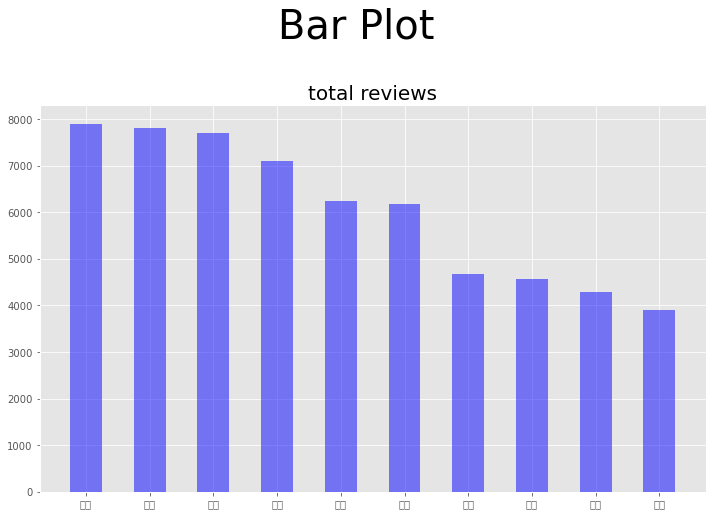

In [77]:
plt.rc('font', family='NanumBarunGothic')
top_10 = dict(noun_list[:10]) # 추출한 명사 중 상위 10개
plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize=40)
plt.title('total reviews', fontsize=20)
plt.bar(top_10.keys(), top_10.values(), width=0.5, color='b', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [81]:
from sklearn.feature_extraction.text import CountVectorizer #sklearn 패키지의 CountVectorizer import

In [82]:
vectorizer = CountVectorizer() #countvectorizer 생성
vectorizer.fit(df_train) # countvectorizer 학습
X = vectorizer.transform(df_train) # transform

In [83]:
y = df.label

In [84]:
from sklearn.linear_model import LogisticRegression

In [107]:
y.value_counts()

1    114759
0      9787
Name: label, dtype: int64

In [102]:
model = LogisticRegression()
model.fit(X,y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
X_pred = vectorizer.transform([input()]) 
y_pred = model.predict(X_pred)
print(y_pred)

 별로입니다


[1]
